# Validation Shape Bias

In [6]:
import matplotlib.pyplot as plt
import seaborn

import util.util_validation as ut_val

seaborn.set_style("darkgrid")

In [7]:
cuda_device = 1

models_dict = {"CE_baseline": ["./save/SupCE/animals10/SupCE_animals10_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_baseline_cosine/models/ckpt_epoch_500.pth", "animals10_diff_-1"],
               "CE_diffused": ["./save/SupCE/animals10_diff_4000/SupCE_animals10_diff_4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_4000_cosine/models/last.pth", "animals10_diff_4000"],
               "CE_diffAug": ["./save/SupCE/animals10_diff_-1+4000/SupCE_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_diffAug_cosine/models/last.pth", None],
               "SupCon_baseline" : ["./save/SupCon/animals10_diff_-1/SupCon_animals10_diff_-1_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_try3_cosine/models/last.pth", "animals10_diff_-1"],
               "SupCon_diffusedNoAug": ["./save/SupCon/animals10_diff_-1+4000/SupCon_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_noAug_cosine/models/last.pth", "animals10_diff_-1"]}

dataset_stConflict = "./datasets/adaIN/shape_texture_conflict_animals10/"

Get the union over all miss classified images


100%|██████████| 202/202 [00:59<00:00,  3.38it/s]


Get predictions for shape texture cue conflict dataset


100%|██████████| 134/134 [00:39<00:00,  3.37it/s]


,CE_baseline,CE_diffused,CE_diffAug,SupCon_baseline,SupCon_diffusedNoAug
shape_bias,0.427590,0.696051,0.515942,0.662939,0.768058
acc,0.504330,0.314376,0.497979,0.542148,0.359700
acc_shape,0.215647,0.218822,0.256928,0.359411,0.276270
acc_texture,0.288684,0.095554,0.241051,0.182737,0.083430


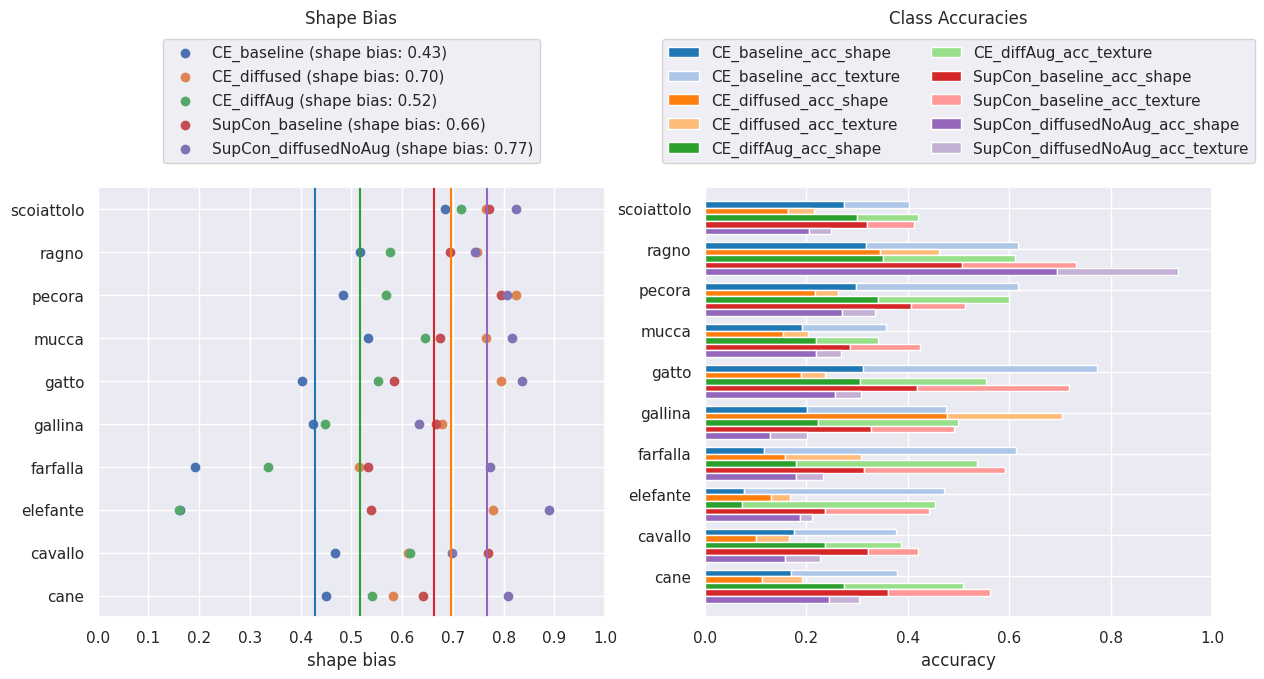

In [8]:
pred_dict, classes = ut_val.evaluate_shape_texture_conflict(models_dict=models_dict, dataset_stConflict=dataset_stConflict, cuda_device=cuda_device)
df_bias, class_biasses = ut_val.compute_shape_biases(pred_dict, classes)

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
fig.tight_layout(w_pad=3)

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[0])
ut_val.plot_class_accuracies_stacked(class_biasses, ax=axs[1])

df_bias

## Old without exclusion of miss classified original images

In [3]:
cuda_device = 0

models_dict = {"CE_baseline": ["./save/SupCE/animals10/SupCE_animals10_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_baseline_cosine/models/ckpt_epoch_500.pth", "animals10_diff_-1"],
               "CE_orig_small": ["./save/SupCE/animals10_diff_-1_small/SupCE_animals10_diff_-1_small_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_origSmall_cosine/models/last.pth", None],
               "CE_diff_small": ["./save/SupCE/animals10_diff_4000_small/SupCE_animals10_diff_4000_small_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_4000Small_cosine/models/last.pth", None],
               "CE_diffused": ["./save/SupCE/animals10_diff_4000/SupCE_animals10_diff_4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_4000_cosine/models/last.pth", "animals10_diff_4000"],
               "SupCon_try2": ["./save/SupCon/animals10/SupCon_animals10_resnet18_lr_0.5_decay_0.0001_bsz_26_temp_0.1_trial_0_try2_cosine/models/last.pth", "animals10_diff_-1"],
               "SupCon_baseline" : ["./save/SupCon/animals10_diff_-1/SupCon_animals10_diff_-1_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_try3_cosine/models/last.pth", "animals10_diff_-1"],
               "SupCon_diffusedNoAug": ["./save/SupCon/animals10_diff_-1+4000/SupCon_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_noAug_cosine/models/last.pth", "animals10_diff_-1"]}

dataset_stConflict = "./datasets/adaIN/shape_texture_conflict_animals10/"

100%|██████████| 202/202 [00:59<00:00,  3.41it/s]


,CE_baseline,CE_orig_small,CE_diff_small,CE_diffused,SupCon_try2,SupCon_baseline,SupCon_diffusedNoAug
shape_bias,0.401296,0.263775,0.334759,0.647984,0.639330,0.631086,0.731579
acc,0.501146,0.537242,0.357143,0.279412,0.444805,0.509931,0.326585
acc_shape,0.201108,0.141711,0.119557,0.181054,0.284377,0.321811,0.238923
acc_texture,0.300038,0.395531,0.237586,0.098358,0.160428,0.188121,0.087662


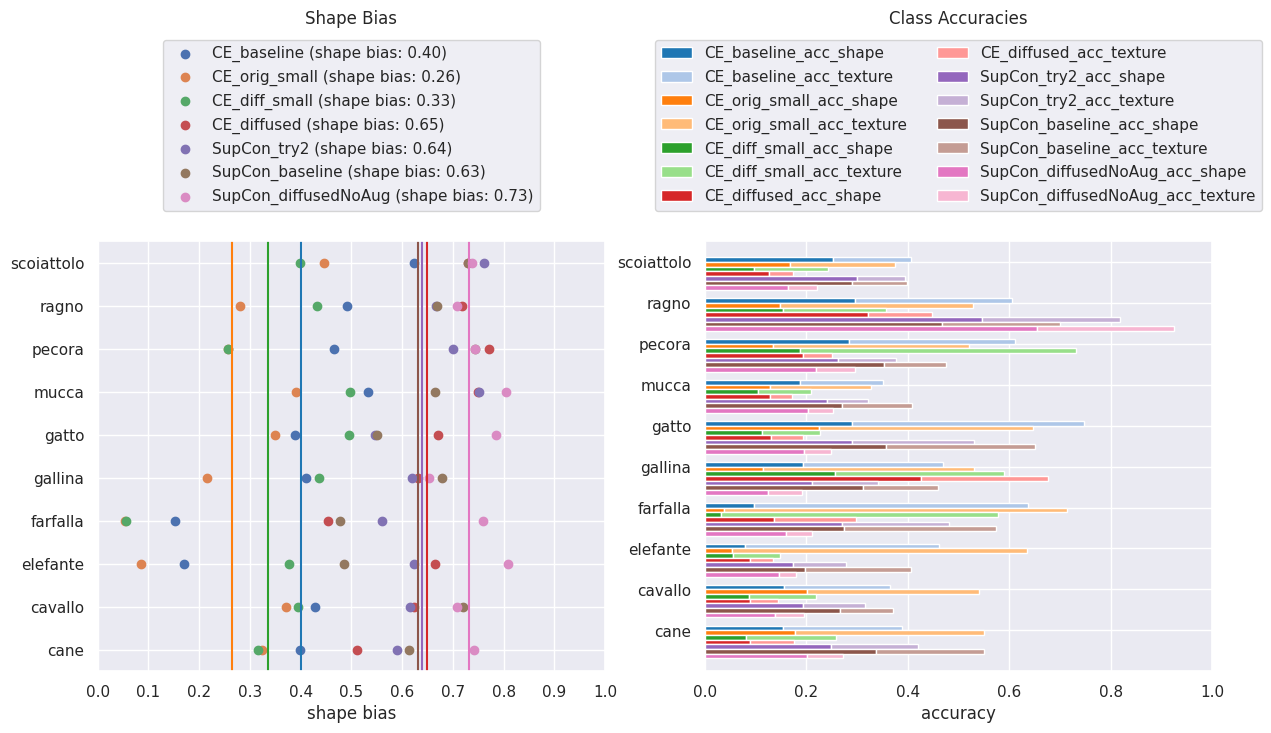

In [5]:
pred_dict, classes = ut_val.evaluate_shape_texture_conflict(models_dict=models_dict, dataset_stConflict=dataset_stConflict, cuda_device=cuda_device)
df_bias, class_biasses = ut_val.compute_shape_biases(pred_dict, classes)

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
fig.tight_layout(w_pad=3)

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[0])
ut_val.plot_class_accuracies_stacked(class_biasses, ax=axs[1])

df_bias

-------------

In [2]:
cuda_device = 1

models_dict = {"CE_baseline": ["./save/SupCE/animals10/SupCE_animals10_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_baseline_cosine/models/ckpt_epoch_500.pth", None],
               "CE_orig_small": ["./save/SupCE/animals10_diff_-1_small/SupCE_animals10_diff_-1_small_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_origSmall_cosine/models/last.pth", "animals10_diff_-1"],
               "CE_diff_small": ["./save/SupCE/animals10_diff_4000_small/SupCE_animals10_diff_4000_small_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_4000Small_cosine/models/last.pth", "animals10_diff_4000"],
               "CE_diffused": ["./save/SupCE/animals10_diff_4000/SupCE_animals10_diff_4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_4000_cosine/models/last.pth", None]}

dataset_stConflict = "./datasets/adaIN/shape_texture_conflict_animals10/"

100%|██████████| 202/202 [00:59<00:00,  3.38it/s]


,CE_baseline,CE_orig_small,CE_diff_small,CE_diffused
shape_bias,0.455158,0.429156,0.428822,0.655579
acc,0.538770,0.466387,0.326012,0.275592
acc_shape,0.245225,0.200153,0.139801,0.180672
acc_texture,0.293545,0.266234,0.186211,0.094920


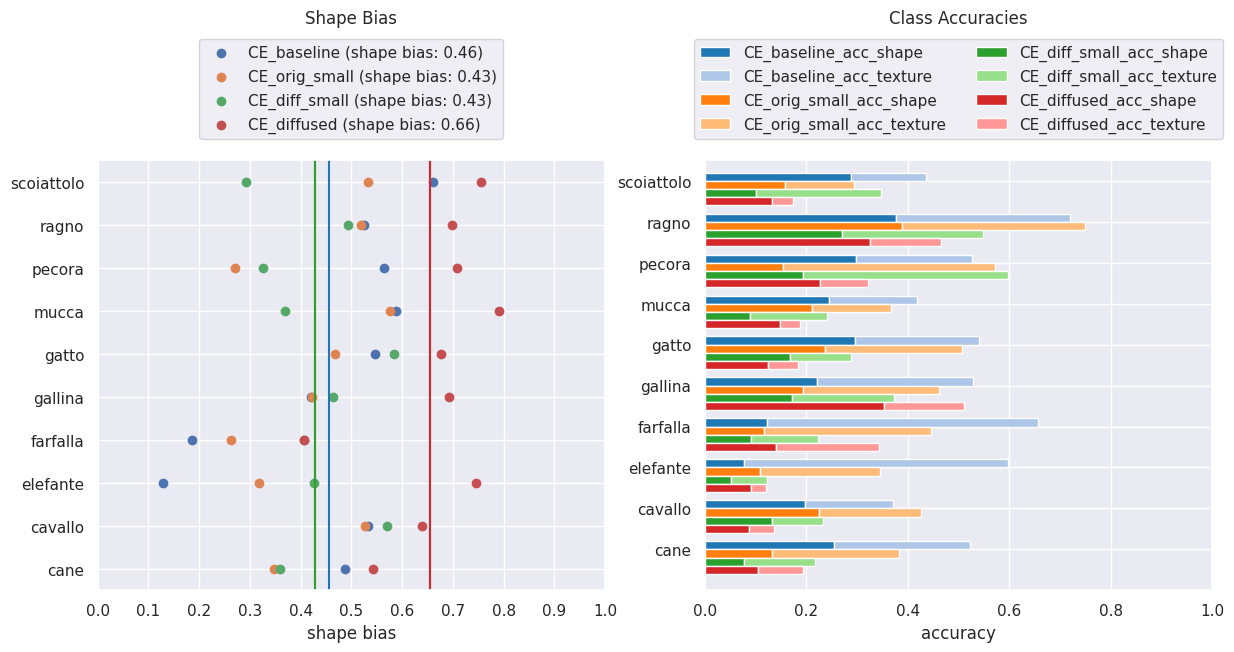

In [3]:
pred_dict, classes = ut_val.evaluate_shape_texture_conflict(models_dict=models_dict, dataset_stConflict=dataset_stConflict, cuda_device=cuda_device)
df_bias, class_biasses = ut_val.compute_shape_biases(pred_dict, classes)

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
fig.tight_layout(w_pad=3)

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[0])
ut_val.plot_class_accuracies_stacked(class_biasses, ax=axs[1])

df_bias

-------

In [2]:
cuda_device = 1

models_dict = {"CE_diffAug": ["./save/SupCE/animals10_diff_-1+4000/SupCE_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_diffAug_cosine/models/last.pth", None],
               "CE_diffAug_-1": ["./save/SupCE/animals10_diff_-1+4000/SupCE_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_diffAug_cosine/models/last.pth", "animals10_diff_-1"],
               "CE_diffAug_4000": ["./save/SupCE/animals10_diff_-1+4000/SupCE_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_diffAug_cosine/models/last.pth", "animals10_diff_4000"]}

dataset_stConflict = "./datasets/adaIN/shape_texture_conflict_animals10/"

100%|██████████| 202/202 [00:59<00:00,  3.37it/s]


,CE_diffAug,CE_diffAug_-1,CE_diffAug_4000
shape_bias,0.491263,0.469379,0.442489
acc,0.480901,0.455309,0.466578
acc_shape,0.236249,0.213713,0.206455
acc_texture,0.244652,0.241597,0.260122


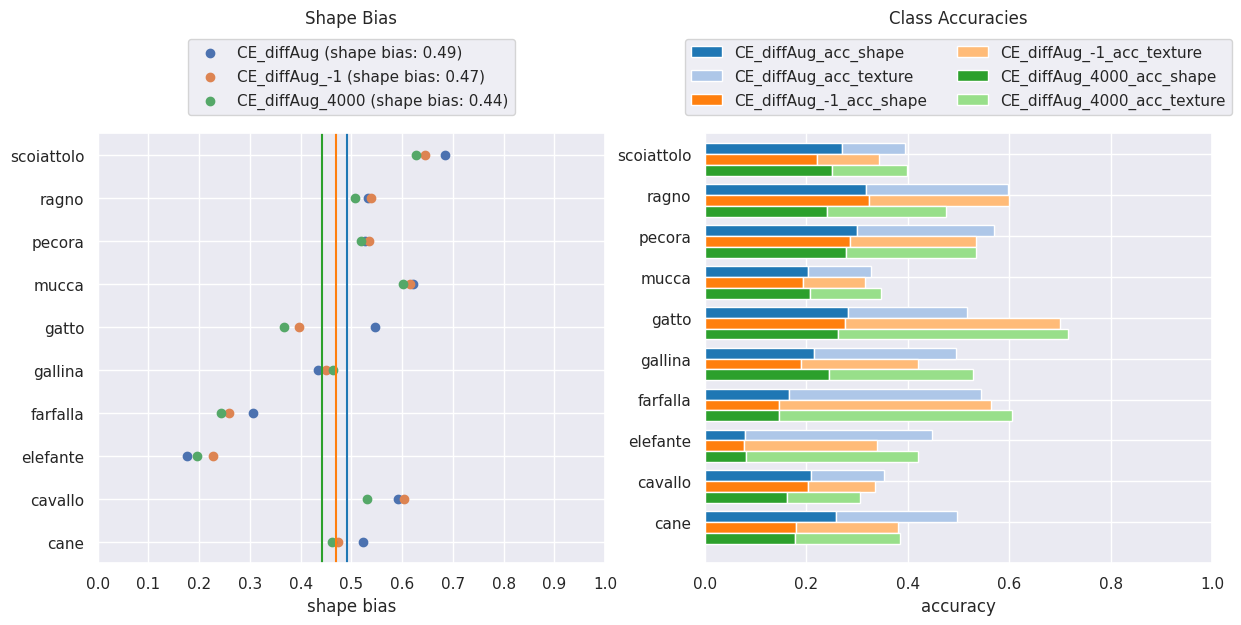

In [5]:
pred_dict, classes = ut_val.evaluate_shape_texture_conflict(models_dict=models_dict, dataset_stConflict=dataset_stConflict, cuda_device=cuda_device)
df_bias, class_biasses = ut_val.compute_shape_biases(pred_dict, classes)

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
fig.tight_layout(w_pad=3)

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[0])
ut_val.plot_class_accuracies_stacked(class_biasses, ax=axs[1])

df_bias

---------